# Example-Portfolio Theory and Its Application in Python

In [1]:
!pip install pyportfolioopt

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt.cla import CLA
from pypfopt import plotting
from pypfopt.plotting import plot_weights
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
tickers = ['AAPL','AMZN','MMM','XOM']
start_date = '2019-07-01'
end_date = '2020-07-01'
stocks = yf.download(tickers,start_date,end_date,interval='1d')

[*********************100%***********************]  4 of 4 downloaded


In [4]:
stocks.head()

Adj Close                          Close                          \
                AAPL     AMZN     MMM    XOM   AAPL     AMZN     MMM    XOM   
Date                                                                          
2019-07-01     49.70  1922.19  166.72  70.86  50.39  1922.19  174.51  76.56   
2019-07-02     49.99  1934.31  166.25  70.08  50.68  1934.31  174.02  75.72   
2019-07-03     50.41  1939.00  167.17  70.75  51.10  1939.00  174.98  76.44   
2019-07-05     50.36  1942.91  164.32  70.46  51.06  1942.91  172.00  76.13   
2019-07-08     49.33  1952.32  161.64  70.79  50.01  1952.32  169.19  76.48   

             High           ...     Low          Open                          \
             AAPL     AMZN  ...     MMM    XOM   AAPL     AMZN     MMM    XOM   
Date                        ...                                                 
2019-07-01  51.12  1929.82  ...  173.52  76.29  50.79  1922.98  175.46  77.13   
2019-07-02  50.78  1934.79  ...  173.07  75.41  50.35  1919.38  175.10  76.14   
2019-07-03  51.11  1941.59  ...  172.93  75.63  50.82  1935.89  174.17  75.82   
2019-07-05  51.27  1945.90  ...  169.73  75.59  50.84  1928.60  173.00  76.19   
2019-07-08  50.35  1956.00  ...  168.77  75.92  50.20  1934.12  169.92  76.14   

               Volume                              
                 AAPL     AMZN      MMM       XOM  
Date                                               
2019-07-01  109012000  3203300  2106700  11453800  
2019-07-02   67740800  2645900  1555400  10475400  
2019-07-03   45448000  1690300  1170700   5246100  
2019-07-05   69062000  2628400  1740500   6880800  
2019-07-08  101354400  2883400  2285300   7876100  

[5 rows x 24 columns]

In [5]:
close_prices=stocks.Close

In [6]:
close_prices['AAPL'].pct_change().mean()*252

0.6761302046932257

In [7]:
mu = expected_returns.mean_historical_return(close_prices) # annualized mean
sigma = risk_models.sample_cov(close_prices)# annualized risk

In [8]:
print('Expected returns are:\n {}'.format(mu))

Expected returns are:
 AAPL    0.676130
AMZN    0.410265
MMM    -0.040449
XOM    -0.429094
dtype: float64


In [9]:
sigma

,AAPL,AMZN,MMM,XOM
AAPL,0.164411,0.086949,0.105006,0.121410
AMZN,0.086949,0.097800,0.052903,0.063349
MMM,0.105006,0.052903,0.143958,0.121978
XOM,0.121410,0.063349,0.121978,0.215292


In [10]:
efficient_front = EfficientFrontier(mu, sigma,weight_bounds=(-1, 1))

In [11]:
efficient_front.min_volatility()

OrderedDict([('AAPL', -0.1813997483912382),
             ('AMZN', 0.7581399948004892),
             ('MMM', 0.3854431700170102),
             ('XOM', 0.0378165835737387)])

In [12]:
efficient_front.efficient_risk(3.1)# Optimal return for a target risk

OrderedDict([('AAPL', 0.9999999999868447),
             ('AMZN', 0.999999999993368),
             ('MMM', -6.04221e-11),
             ('XOM', -0.9999999999197898)])

In [13]:
clean_weights = efficient_front.clean_weights()
print('Weights are:\n {}'.format(clean_weights))

Weights are:
 OrderedDict([('AAPL', 1.0), ('AMZN', 1.0), ('MMM', 0.0), ('XOM', -1.0)])


In [14]:
efficient_front.efficient_return(0.05)# Minimal risk for a target return

OrderedDict([('AAPL', -0.1813992134657808),
             ('AMZN', 0.7581397882136183),
             ('MMM', 0.3854437682482622),
             ('XOM', 0.0378156570040278)])

In [15]:
efficient_front.max_sharpe()# Maximum Sharpe ratio

OrderedDict([('AAPL', 0.9999999996519858),
             ('AMZN', 0.9953252386476859),
             ('MMM', 0.0046747594604285),
             ('XOM', -0.9999999977601114)])

In [16]:
efficient_front.portfolio_performance(verbose=True, risk_free_rate = 0.01)

Expected annual return: 151.3%
Annual volatility: 53.0%
Sharpe Ratio: 2.84


(1.5133822988933103, 0.5301772653409106, 2.835621964903789)

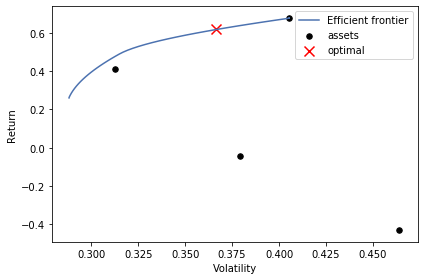

In [17]:
cla = CLA(mu, sigma)
plotting.plot_efficient_frontier(cla);

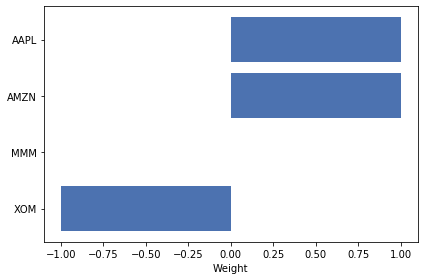

In [18]:
plotting.plot_weights(clean_weights);# Plot the portfolio weights as a horizontal bar chart